# Evaluating regression #

Let's have a look at how to evaluate our linear model.

In [5]:
import seaborn as sns
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression #remember, this is linear regression model from sk-learn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [6]:
df = pd.read_csv('funda.csv')
df.head()

,id,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built
0,0,Knollendamstraat 4 III/IV,108,2,1013 TN,4-6-2016,510000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906
1,1,Moerdijkstraat 47 1,47,1,1079 XM,22-6-2016,215000,apartment,2,5-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1938
2,2,Zeeburgerdijk 349,116,2,1095 AD,9-6-2016,325000,apartment,3,8-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2003
3,3,Brederodestraat 124 -1,58,2,1054 VH,14-5-2016,315000,apartment,3,2-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1910
4,4,Admiraal De Ruijterweg 409 III,63,1,1055 MD,14-6-2016,200000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906


We need to remove the strange values again, keep only:

* Price above 30,000
* Area above 10 m2

In [7]:
df = df[(df['price'] > 30000) & (df['area'] > 10)] #we want to subset the original dataset, otherwise we lose data

## Simple linear regression ##

In [8]:
from sklearn.linear_model import LinearRegression #we need this specific model from sk-learn

x = df[['area']] #to use sk-learn, we need to create lists of the two variables
y = df['price']

lm = LinearRegression() #this creates a new LR model
lm.fit(x, y) #this "fits" the model

b0 = lm.intercept_ #lm.coef_ gets a list of coefficients (excluding the intercept). [0] gets the actual number from the list
b1 = lm.coef_[0] #gets the intercept

print(f"The regression line is equal to y = {b0:.2f} + {b1:.2f}X") #.0f formats to 2 decimals.

The regression line is equal to y = 27983.93 + 3498.81X


Or, in Markdown: 

$y= 27983.93 + 3498.81x$

where *x* is price in euros and *y* is area in squared meters

In [9]:
df['price_p'] = lm.predict(x) #use built-in predict() method to generate predictions; store in original dataframe
df.head()


,id,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built,price_p
0,0,Knollendamstraat 4 III/IV,108,2,1013 TN,4-6-2016,510000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906,405855.880756
1,1,Moerdijkstraat 47 1,47,1,1079 XM,22-6-2016,215000,apartment,2,5-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1938,192428.204791
2,2,Zeeburgerdijk 349,116,2,1095 AD,9-6-2016,325000,apartment,3,8-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2003,433846.395637
3,3,Brederodestraat 124 -1,58,2,1054 VH,14-5-2016,315000,apartment,3,2-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1910,230915.162752
4,4,Admiraal De Ruijterweg 409 III,63,1,1055 MD,14-6-2016,200000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906,248409.234552


Now add the residuals for all houses to the dataframe:

In [10]:
df["resid"] = df["price"] - df["price_p"]
df.head()

,id,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built,price_p,resid
0,0,Knollendamstraat 4 III/IV,108,2,1013 TN,4-6-2016,510000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906,405855.880756,104144.119244
1,1,Moerdijkstraat 47 1,47,1,1079 XM,22-6-2016,215000,apartment,2,5-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1938,192428.204791,22571.795209
2,2,Zeeburgerdijk 349,116,2,1095 AD,9-6-2016,325000,apartment,3,8-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2003,433846.395637,-108846.395637
3,3,Brederodestraat 124 -1,58,2,1054 VH,14-5-2016,315000,apartment,3,2-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1910,230915.162752,84084.837248
4,4,Admiraal De Ruijterweg 409 III,63,1,1055 MD,14-6-2016,200000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906,248409.234552,-48409.234552


## Evaluating the model ##

1. Plot the price versus the predicted price in a scatterplot

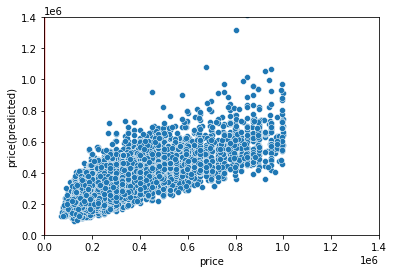

In [14]:
sns.scatterplot(x='price', y='price_p', data=df)
plt.xlim(0, 1400000) #This sets the x-axis limits 
plt.ylim(0, 1400000)
plt.plot([0, 1, 5e6], color='red', lw=2)
plt.xlabel("price")
plt.ylabel("price(predicted)")
plt.show()

2. Plot the area versus the residuals in a scatterplot

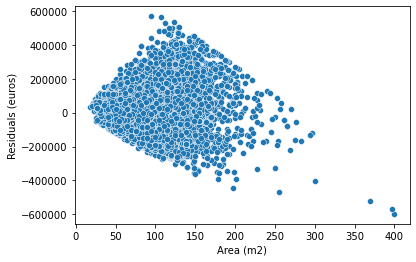

In [15]:
sns.scatterplot(x="area", y="resid", data=df)
plt.xlabel("Area (m2)")
plt.ylabel("Residuals (euros)")
plt.show()

3. finally we are going to calculate the r2 squared and RMSE. Run the code below and write down your conclusions

In [16]:
r2_score(df['price'], df['price_p'])

0.5257421182315432

In [17]:
math.sqrt(mean_squared_error(df['price'], df['price_p'])) #this gives the model fit (R2) for the Y and predicted Y

118016.87861535022

### Conclusions:

# Based on the R^2, we can predict 52.5% of the variation price based on area. Our typical prediction is off by 118017 euros. As we can see in the Y-Y' plot and the residual plot, the errors increase with area.